#### Challenger Crash Data...

In [2]:
import pandas as pd
data = pd.read_excel("Datasets//Challenger_crash.xlsx", sheet_name = "Sheet1")
display(data)

,Flight,Temperature,Damage
0,STS-1,66,No
1,STS-2,70,Yes
2,STS-3,69,No
3,STS-4,80,No
4,STS-5,68,No
5,STS-6,67,No
6,STS-7,72,No
7,STS-8,73,No
8,STS-9,70,No
9,STS-41B,57,Yes


In [3]:
# Encoding Yes/No vlaues in the Damage coloumn of the dataset...
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
data["Damage"]= label_encoder.fit_transform(data["Damage"])
display(data)

,Flight,Temperature,Damage
0,STS-1,66,0
1,STS-2,70,1
2,STS-3,69,0
3,STS-4,80,0
4,STS-5,68,0
5,STS-6,67,0
6,STS-7,72,0
7,STS-8,73,0
8,STS-9,70,0
9,STS-41B,57,1


In [4]:
X = pd.DataFrame(data[["Temperature"]])
y = pd.DataFrame(data[["Damage"]])
display(X)
display(y)

,Temperature
0,66
1,70
2,69
3,80
4,68
5,67
6,72
7,73
8,70
9,57


,Damage
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [5]:
# Fitting data into Logistic Regression Model...
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.Logit(y, X)
result = model.fit(method="newton")     # What is this NEWTON method???

Optimization terminated successfully.
         Current function value: 0.424404
         Iterations 7


In [6]:
# Evaluating the Model summary...

result.predict(X)
pred1 = (result.predict(X) >= 0.5).astype(int)
result.pred_table()

res1 = result.summary()
res2 = result.summary2()

display(res1)
display(res2)

print("PREDICTED VALUES...")
display(pred1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Damage   No. Observations:                   24
Model:                          Logit   Df Residuals:                       22
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Nov 2022   Pseudo R-squ.:                  0.2969
Time:                        12:00:18   Log-Likelihood:                -10.186
converged:                       True   LL-Null:                       -14.487
Covariance Type:            nonrobust   LLR p-value:                  0.003356
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          15.2968      7.329      2.087      0.037       0.933      29.661
Temperature    -0.2360      0.107     -2.198      0.028      -0.446      -0.026
===============================================================================
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.297    
Dependent Variable: Damage           AIC:              24.3714  
Date:               2022-11-24 12:00 BIC:              26.7275  
No. Observations:   24               Log-Likelihood:   -10.186  
Df Model:           1                LL-Null:          -14.487  
Df Residuals:       22               LLR p-value:      0.0033558
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const        15.2968    7.3286   2.0873  0.0369   0.9329  29.6607
Temperature  -0.2360    0.1074  -2.1982  0.0279  -0.4465  -0.0256
================================================================

"""

PREDICTED VALUES...


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
dtype: int32

#### Diabetes Data...

In [7]:
import pandas as pd
data = pd.read_excel("Datasets//diabetes.xlsx", sheet_name = "diabetes")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
#X = pd.DataFrame(data[['Age']])
#X = pd.DataFrame(data[['marital_married', 'marital_single']])
#X = pd.DataFrame(data[['education_secondary', 'education_tertiary', 'education_unknown']])
#X = pd.DataFrame(data[['job_blue-collar', 'job_management', 'job_self-employed', 'job_unemployed']])
X = pd.DataFrame(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
y = pd.DataFrame(data[['Outcome']])

display(X)
display(y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [21]:
# Alternative method of fitting a Logistic Regression Model...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.coef_

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.08528074,  0.03447238, -0.01082109,  0.00636537, -0.0013322 ,
         0.08852963,  0.73271327,  0.02415037]])

In [22]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [23]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

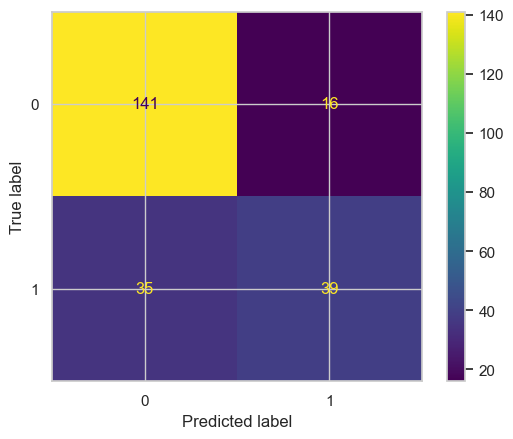

In [24]:
# Preparing Confusion Matrix...
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

In [25]:
print(cm)

[[141  16]
 [ 35  39]]


In [26]:
# Confusion Matrix Metrics...
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



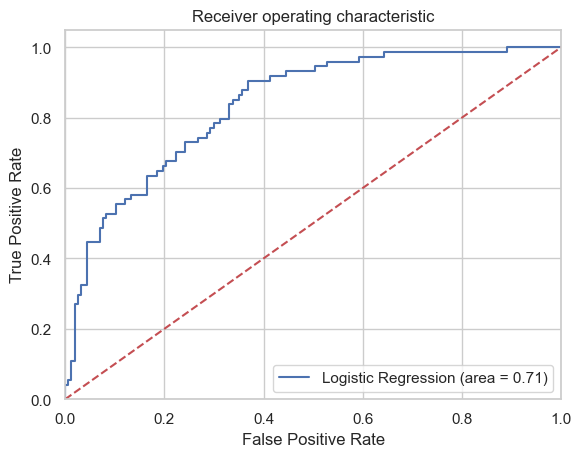

In [27]:
# Plotting ROC Curve...
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [29]:
# Logistic Regression Model Summary...
import numpy as np
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.Logit(y, X)
result = model.fit(method='newton')

res1 = result.summary()
res2 = result.summary2()

display(res1)
display(res2)

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Thu, 24 Nov 2022   Pseudo R-squ.:                  0.2718
Time:                        12:05:36   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.272     
Dependent Variable:     Outcome            AIC:                741.4454  
Date:                   2022-11-24 12:05   BIC:                783.2395  
No. Observations:       768                Log-Likelihood:     -361.72   
Df Model:               8                  LL-Null:            -496.74   
Df Residuals:           759                LLR p-value:        9.6516e-54
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         6.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                    -8.4047   0.7166 -11.7280 0.0000 -9.8093 -7.0001
Pregnancies               0.1232   0.0321   3.8401 0.0001  0.0603  0.1861
Glucose                   0.0352   0.0037   9.4814 0.0000  0.0279  0.0424
BloodPressure            -0.0133   0.0052  -2.5404 0.0111 -0.0236 -0.0030
SkinThickness             0.0006   0.0069   0.0897 0.9285 -0.0129  0.0141
Insulin                  -0.0012   0.0009  -1.3223 0.1861 -0.0030  0.0006
BMI                       0.0897   0.0151   5.9453 0.0000  0.0601  0.1193
DiabetesPedigreeFunction  0.9452   0.2991   3.1596 0.0016  0.3589  1.5315
Age                       0.0149   0.0093   1.5929 0.1112 -0.0034  0.0332
=========================================================================

"""